In [1]:
from skimage import color, data, io, filters, transform
import matplotlib.pyplot as plt
import numpy as np

def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(8, 12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
#     plt.grid(True)
    plt.show()

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = \
        plt.subplots(ncols=2, figsize=(16, 12), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

## 1. Let's restore a damaged image

In this exercise, we'll restore an image that has missing parts in it, using the `inpaint_biharmonic()` function.

![Small cute puppy](images/1.png)

In [2]:
damaged_astronaut = io.imread('images/1.png')

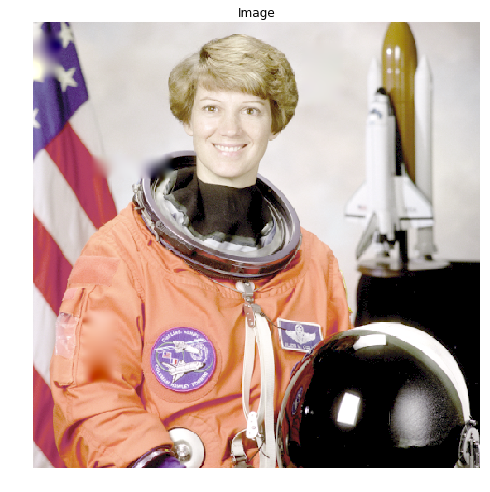

In [3]:
from skimage.restoration import inpaint
mask = np.zeros((damaged_astronaut.shape[0], damaged_astronaut.shape[1]))
mask[10:70, 0:35] = 1
mask[160:190, 70:170] = 1
mask[25:100, 325:375] = 1
mask[350:435, 60:100] = 1
restored_astronaut = \
    inpaint.inpaint_biharmonic(damaged_astronaut, mask, multichannel=True)
show_image(restored_astronaut)

## 2. Removing logos

As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

![Landscape with small datacamp logo](images/2.png)

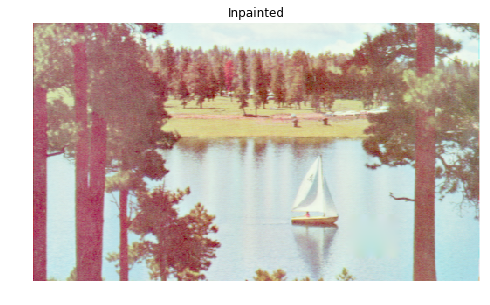

In [4]:
image_with_logo = io.imread('images/2.png')
mask = np.zeros((image_with_logo.shape[0], image_with_logo.shape[1]))
mask[220:270,360:420] = 1
image_wo_logo = \
    inpaint.inpaint_biharmonic(image_with_logo, mask, multichannel=True)
show_image(image_wo_logo, 'Inpainted')

## 3.Let's make some noise!

In this exercise, we'll practice adding noise to a fruit image.

![Various fruits](images/3.jpg)

In [5]:
fruits_image = io.imread('images/3.jpg')

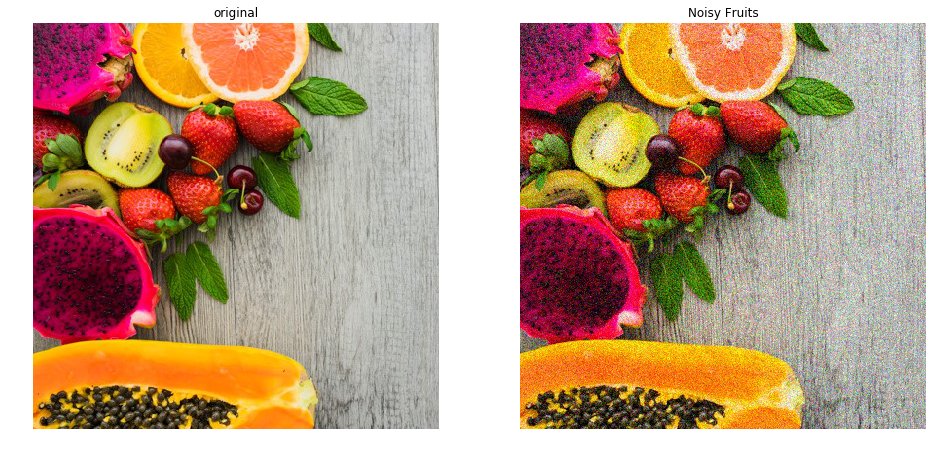

In [6]:
from skimage import util
noisy_fruits = util.random_noise(fruits_image)
plot_comparison(fruits_image, noisy_fruits, 'Noisy Fruits')

## 4. Reducing noise

We have a noisy image that we want to improve by removing the noise in it.

![Small cute puppy](images/4.jpeg)

In [7]:
noisy_puppy = io.imread('images/4.jpeg')

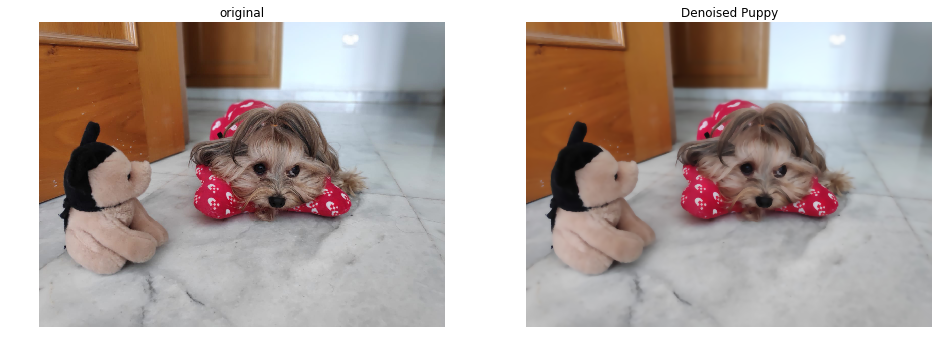

In [8]:
from skimage import restoration
denoised_puppy = restoration.denoise_tv_chambolle(
    noisy_puppy, weight=.1, multichannel=True)
plot_comparison(noisy_puppy, denoised_puppy, 'Denoised Puppy')

## 5. Reducing noise while preserving edges

In this exercise, you will reduce the noise in this landscape picture.

![Landscape of a river](images/5.jpg)

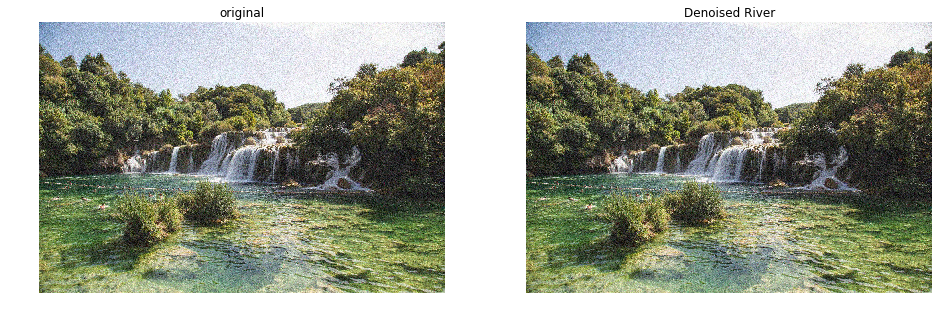

In [9]:
noisy_river = io.imread('images/5.jpg')
denoised_river = restoration.denoise_bilateral(
    noisy_river, multichannel=True)
plot_comparison(noisy_river, denoised_river, 'Denoised River')

## 6. Number of pixels

Let's calculate the total number of pixels in this image.

![Young woman](images/6.jpg)

In [10]:
woman = io.imread('images/6.jpg')
woman.shape[0] * woman.shape[1]

50615

## 7. Superpixel segmentation

In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from 265 × 191 = 50,615 pixels down to 400 regions.

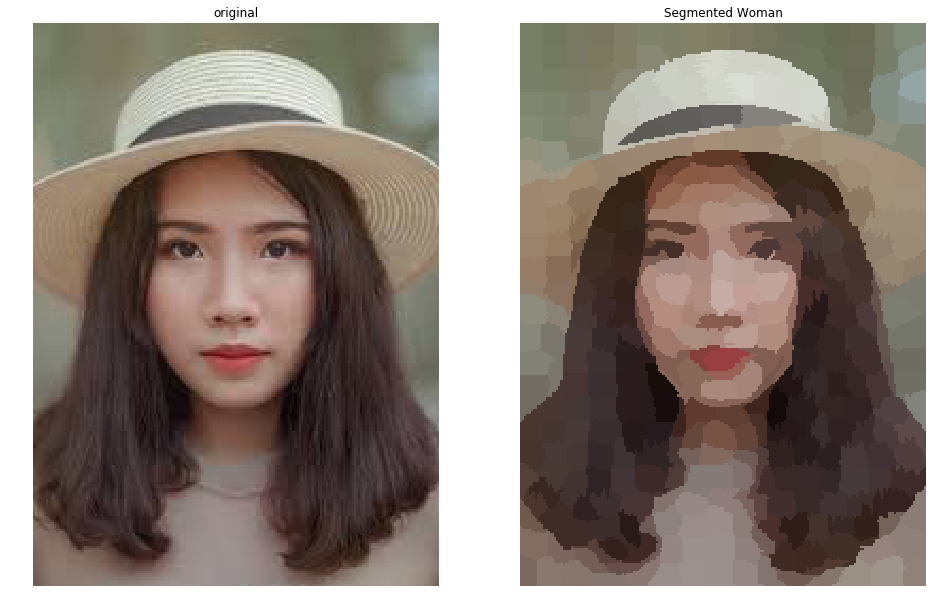

In [11]:
from skimage import color, segmentation
from skimage.color import label2rgb
segments = segmentation.slic(woman, n_segments=400)
segmented_woman = color.label2rgb(segments, woman, kind='avg')
plot_comparison(woman, segmented_woman, "Segmented Woman")

## 8. Contouring shapes

In this exercise we'll find the contour of a horse.

For that we will make use of a **binarized** image provided by scikit-image in its `data` module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

![Shape of a horse in black and white](images/8.png)

In [12]:
horse_image = data.horse()
thresh = filters.threshold_otsu(horse_image)
thresholded_horse = 255 * (horse_image <= thresh)

In [13]:
def show_image_contour(image, contours):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

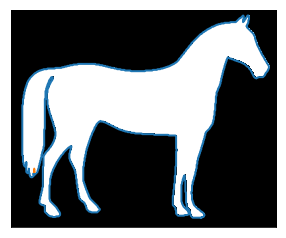

In [14]:
from skimage import measure
contours = measure.find_contours(thresholded_horse, 0.8)
show_image_contour(thresholded_horse, contours)

## 9. Find contours of an image that is not binary

Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dices loaded as `image_dices` and determine what number was rolled for each dice.

![Purple dices](images/9.png)

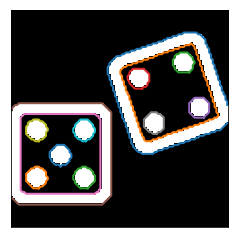

Rolled a total of 9 points.


In [15]:
image_dices = io.imread('images/9.png', as_gray=True)
thresh = filters.threshold_otsu(image_dices)
thresholded_dices = 255 * (image_dices > thresh)
contours = measure.find_contours(thresholded_dices, .8)
show_image_contour(thresholded_dices, contours)
print(f'Rolled a total of {len(contours) - 4} points.')